In [1]:
import requests
import numpy as np
import pandas as pd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

#data_i = '2023-07-01'
#data_f = '2023-08-31'

current_dateTime = datetime.now()
data_f = current_dateTime.strftime('%Y-%m-%d')
data_i = '1997-06-01'

stations = pd.read_excel("cod_estacoes_todas.xlsx", 'Estações')
stations_dic = stations.set_index('Código')['Município'].to_dict()

sensors = pd.read_excel("cod_estacoes_todas.xlsx", 'Sensores')
sensors_dic = sensors.set_index('ssrdescricao')['ssrcodigo'].to_dict()

operations = pd.read_excel("cod_estacoes_todas.xlsx", 'Operadores')
operations_dic = operations.set_index('opefuncao')['opecodigo'].to_dict()

print('Digite o número correspondente à variável meteorológica (sensor):\n')

for sensor,valor in sensors_dic.items():
    if 'Precipitação' in sensor or 'Temperatura' in sensor or 'Velocidade' in sensor:
        print(f'{sensor}:',valor)

print('\n')
i_sensors = input('Sua escolha para o sensor é: ')

print('\n')
print('Digite o nome do tipo de variável. Exemplo:\n')


for operador,valor in operations_dic.items():
    if 'Máxima(o)' in operador or 'Média' in operador or 'Mínima(o)' in operador or 'Total' in operador:
        if not ' ' in operador:
            print(f'{operador}:',valor)

print('\n')
i_operations = input('Sua escolha para o operador é: ')

C:\Users\Operação\AppData\Local\Temp\ipykernel_7360\944582216.py:17: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  stations = pd.read_excel("cod_estacoes_todas.xlsx", 'Estações')


Digite o número correspondente à variável meteorológica (sensor):

Precipitação: 7
Precipitação Acumulada: 11
Precipitação Acumulada Total: 31
Precipitação Máxima: 51
Temperatura da Agua: 20
Temperatura do Solo Mínima: 28
Temperatura Interna: 38
Temperatura Máxima: 4
Temperatura Média: 1
Temperatura Mínima: 5
Temperatura Mínima de Relva: 3
Velocidade da Rajada: 9
Velocidade da Rajada Máxima: 46
Velocidade da Rajada Mínima: 57
Velocidade do Vento: 8
Velocidade do Vento Máxima: 47
Velocidade do Vento Mínima: 56


Sua escolha para o sensor é: 7


Digite o nome do tipo de variável. Exemplo:

Média: 1
Máxima(o): 2
Mínima(o): 3
Total: 4


Sua escolha para o operador é: 4


In [2]:
dataframes = []
foz_dataframes = []
cianorte_dataframes = []
palmital_dataframes = []
umuarama_dataframes = []
salto_caxias_dataframes = []
campo_mourao_dataframes = []

merged_df = pd.DataFrame()

#  Ddataframe com um índice de datas completo
full_date_range = pd.date_range(start=data_i, end=data_f)
df_dates = pd.DataFrame(index=full_date_range)

for codigo_estacao in stations['Código']:
    try:
        url = f'https://cluster.simepar.br/rest-telemetric/dailysummary?start_date={data_i}&end_date={data_f}& \
        organizations=1&stationtypes=M&stations={codigo_estacao}&sensors={i_sensors}&operations={i_operations}& \
        federativeunits=PR'

        response = requests.get(url)

        df = pd.DataFrame(response.json())
        df['data'] = pd.to_datetime(df['data'])
        df.set_index('data', inplace=True)

        df.rename(columns = {'value': f'{stations_dic[codigo_estacao]}'}, inplace = True)

        if codigo_estacao == 25245437:
            foz_antiga = df
            foz_antiga = foz_antiga.drop(pd.to_datetime('2017-05-09'))            
        elif codigo_estacao == 25435458:
            foz_recente = df
            foz_recente.rename(columns={'Foz do Iguaçu - Itaipu':'Foz do Iguaçu'}, inplace=True)
            foz_dataframes.append(foz_recente)
            foz_dataframes.append(foz_antiga)
            foz_dataframes.reverse()
            foz_do_iguacu = pd.concat(foz_dataframes)
            df = pd.concat(foz_dataframes)
            dataframes.append(df)

        elif codigo_estacao == 23395232:
            cianorte_antiga = df
            cianorte_antiga = cianorte_antiga.drop(pd.to_datetime('2016-09-14'))                
        elif codigo_estacao == 23695263:
            cianorte_recente = df
            cianorte_recente.rename(columns={'Cianorte Concamar':'Cianorte'}, inplace=True)
            cianorte_dataframes.append(cianorte_recente)
            cianorte_dataframes.append(cianorte_antiga)
#            cianorte_dataframes.reverse()
            cianorte = pd.concat(cianorte_dataframes)
            df = pd.concat(cianorte_dataframes)
            dataframes.append(df)

        elif codigo_estacao == 24535213:
            palmital_antiga = df
            palmital_antiga = palmital_antiga.drop(pd.to_datetime('2022-10-07'))                
        elif codigo_estacao == 24905199:
            palmital_recente = df
            palmital_recente.rename(columns={'Palmital – Sta Maria do Oeste':'Palmital'}, inplace=True)
            palmital_dataframes.append(palmital_recente)
            palmital_dataframes.append(palmital_antiga)
            palmital = pd.concat(palmital_dataframes)
            df = pd.concat(palmital_dataframes)
            dataframes.append(df)

        elif codigo_estacao == 23445317:
            umuarama_antiga = df
            umuarama_antiga.rename(columns={'Umuarama_Antiga':'Umuarama'}, inplace=True)
        elif codigo_estacao == 23785355:
            umuarama_recente = df
            umuarama_dataframes.append(umuarama_recente)
            umuarama_dataframes.append(umuarama_antiga)
            umuarama = pd.concat(umuarama_dataframes)
            df = pd.concat(umuarama_dataframes)
            dataframes.append(df)

        elif codigo_estacao == 25315329:
            salto_caxias_antiga = df
            salto_caxias_antiga.rename(columns={'Salto Caxias – Antiga':'Salto Caxias'}, inplace=True)
            salto_caxias_antiga = salto_caxias_antiga.drop(pd.to_datetime('2023-06-20'))
        elif codigo_estacao == 24535347:
            salto_caxias_recente = df
            salto_caxias_dataframes.append(salto_caxias_recente)
            salto_caxias_dataframes.append(salto_caxias_antiga)
            salto_caxias = pd.concat(salto_caxias_dataframes)
            df = pd.concat(salto_caxias_dataframes)
            dataframes.append(df)

        elif codigo_estacao == 24035222:
            campo_mourao_antiga = df
            campo_mourao_antiga.rename(columns={'Campo Mourão – Antiga':'Campo Mourão'}, inplace=True)
        elif codigo_estacao == 24075240:
            campo_mourao_recente = df
            campo_mourao_dataframes.append(campo_mourao_recente)
            campo_mourao_dataframes.append(campo_mourao_antiga)
            campo_mourao = pd.concat(campo_mourao_dataframes)
            df = pd.concat(campo_mourao_dataframes)
            dataframes.append(df)
        else:
            dataframes.append(df)
        
    except:
        erro = sys.exc_info()
        print(codigo_estacao, erro)
        continue

# Junta os dataframes
merged_df = pd.concat(dataframes, axis=1)

unwanted_cols = ['stationId','sensorId','operationId','hora','minuto']

# Retira colunas duplicadas e a coluna 'stationId'
merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]

for i in unwanted_cols:
    try:
        merged_df.drop(columns = [i], inplace=True)
    except:
        pass

2452018 (<class 'KeyError'>, KeyError('data'), <traceback object at 0x0000025A123511C0>)
23155060 (<class 'KeyError'>, KeyError('data'), <traceback object at 0x0000025A12359640>)
25285038 (<class 'KeyError'>, KeyError('data'), <traceback object at 0x0000025A12375480>)
23195108 (<class 'KeyError'>, KeyError('data'), <traceback object at 0x0000025A1232ED80>)
2548055 (<class 'KeyError'>, KeyError('data'), <traceback object at 0x0000025A1232E640>)


# Dados Coletados das Estações

# Resumo

In [39]:
import pandas as pd

meses_numericos = list(range(1,13))
meses_nominais = ['janeiro','fevereiro','março','abril','maio','junho','julho','agosto','setembro','outubro','novembro','dezembro']
dicionario_anual = {}

for i,j in zip(meses_numericos,meses_nominais):
    dicionario_anual[i] = j

def analise_precipitacao(df, data_especifica, inicio_periodo, fim_periodo, mes_ano, ano):
    
    resultado = []

    for municipio in df.columns:
        # Remove as linhas com valores NaN para o município atual
        df_municipio = df[municipio].dropna()

        # Acumulado de um dia específico
        acumulado_dia_especifico = df_municipio.get(data_especifica, 0)
        
        # Acumulado entre um período de dias
        acumulado_periodo = df_municipio.loc[inicio_periodo:fim_periodo].sum()
        
        # Acumulado de um determinado mês
        acumulado_mes = df_municipio.loc[mes_ano].sum() if mes_ano in df_municipio.index else 0
        
        # Acumulado do ano
        acumulado_ano = df_municipio.loc[str(ano)].sum() if str(ano) in df_municipio.index else 0
        
        # Média histórica de acumulado do mês específico
        mes = pd.to_datetime(mes_ano).month
        media_historica_mes = round(df_municipio[df_municipio.index.month == mes].resample('Y').sum().mean(), 2)
        
        mes_nome = dicionario_anual[mes]
        
        # Anomalia do acumulado do mês específico em relação à média histórica para o mês
        anomalia = round((acumulado_mes - media_historica_mes), 2)
        
        resultado.append([municipio, acumulado_dia_especifico, acumulado_periodo, acumulado_mes, acumulado_ano, media_historica_mes, anomalia])
        
    resultado_df = pd.DataFrame(resultado, columns=['Estação', f'Acumulado em {data_especifica}', 
                                                    f'Acumulado entre {inicio_periodo} e {fim_periodo}', 
                                                    f'Acumulado de {mes_nome}', f'Acumulado em {ano}', 
                                                    f'Média histórica de {mes_nome}', 
                                                    f'Anomalia de {mes_nome} em relação à média histórica para o mês'])
    
    return resultado_df

resultado = analise_precipitacao(merged_df, '2023-11-23', '2023-11-01', '2023-11-23', '2023-11', 2023)
resultado = resultado.drop(32)
resultado

,Estação,Acumulado em 2023-11-23,Acumulado entre 2023-11-01 e 2023-11-23,Acumulado de novembro,Acumulado em 2023,Média histórica de novembro,Anomalia de novembro em relação à média histórica para o mês
0,Altônia,100.0,148.6,148.6,1183.0,114.83,33.77
1,Antonina,27.8,178.8,178.8,2589.6,222.65,-43.85
2,APPA Antonina,11.6,128.2,128.2,1351.0,161.86,-33.66
3,Apucarana,43.6,159.2,159.2,1458.6,154.30,4.90
4,Assis Chateaubriand,24.8,107.0,107.0,1594.0,150.84,-43.84
...,...,...,...,...,...,...,...
70,Nova Tebas (INMET),0.0,0.0,0.0,132.8,126.83,-126.83
71,Paranapoema (INMET),0.2,72.0,72.0,1026.6,83.92,-11.92
72,Planalto (INMET),7.0,157.4,157.4,1114.2,124.24,33.16
73,São Mateus do Sul (INMET),0.0,104.6,104.6,1025.0,107.98,-3.38


# Gráficos

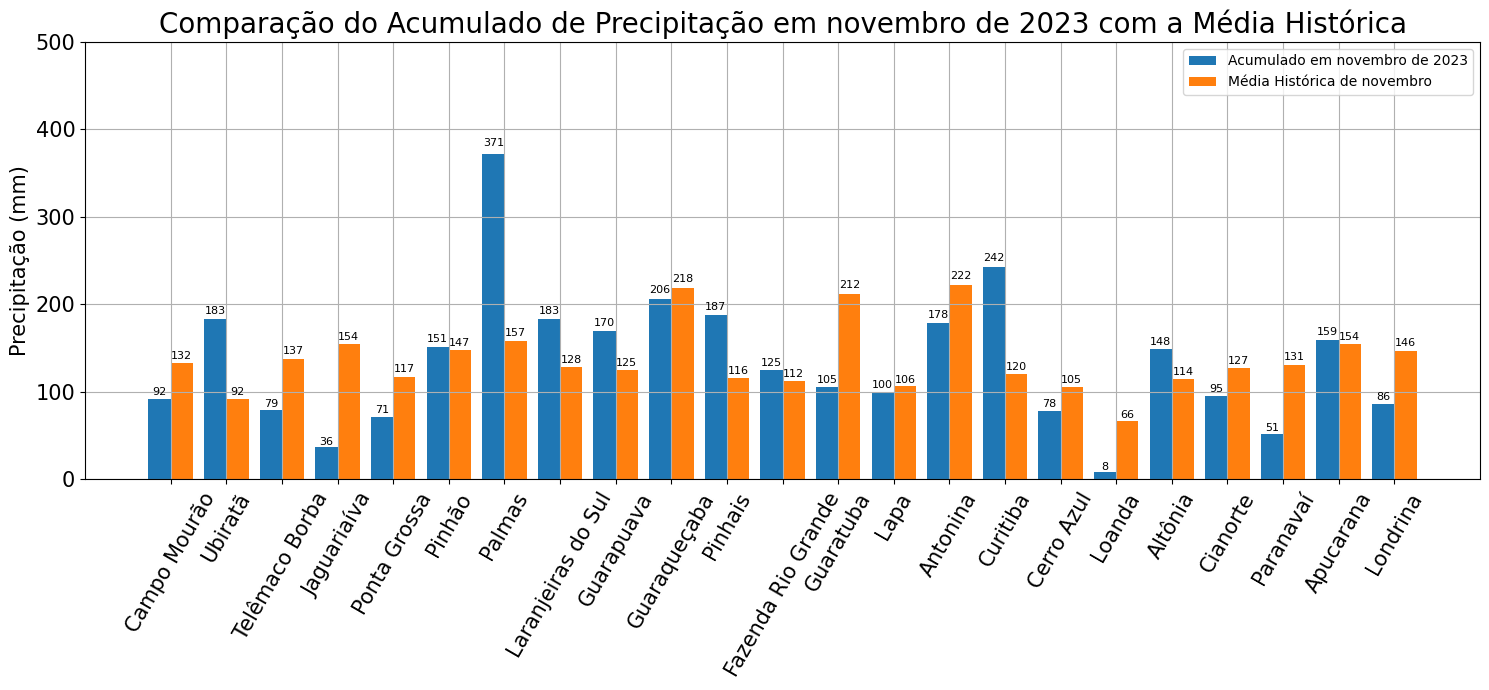

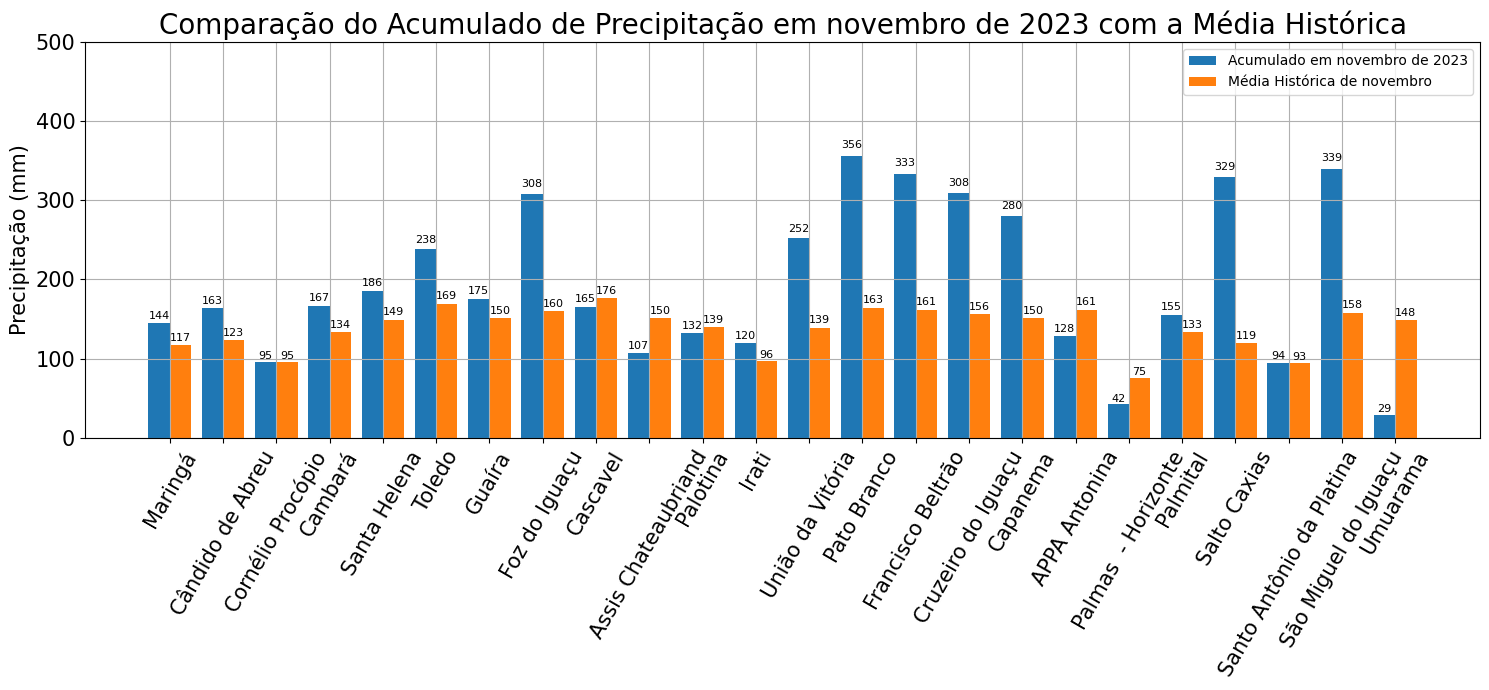

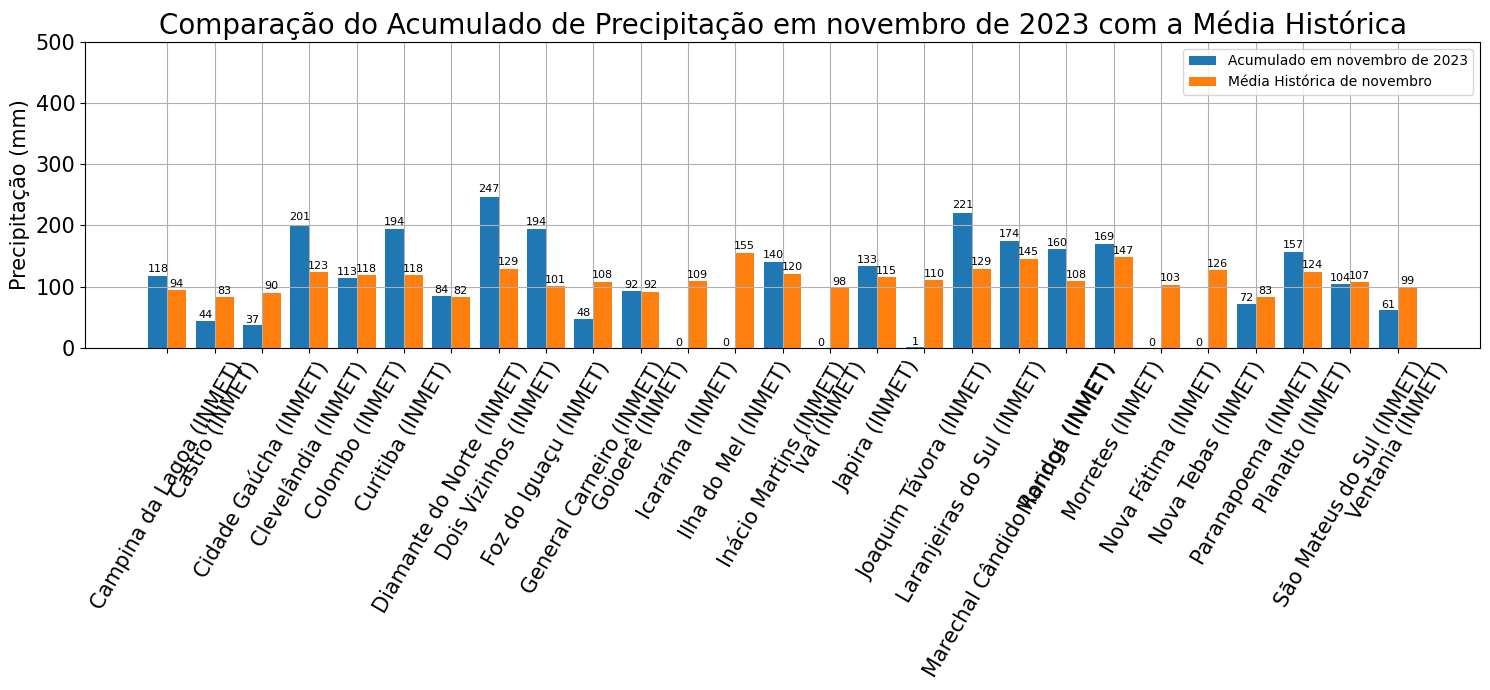

In [28]:
import matplotlib.pyplot as plt
import numpy as np

'''
# Lista com as cidades de interesse
cidades_de_interesse = [
    'Maringá', 'Paranavaí', 'Londrina', 'Apucarana', 'Campo Mourão', 'Ubiratã', 
    'Ponta Grossa', 'Telêmaco Borba', 'Cascavel', 'Foz do Iguaçu', 
    'Pato Branco', 'Francisco Beltrão', 'Guarapuava', 'União da Vitória', 
    'Curitiba', 'Pinhais', 'S. Antônio da Platina', 'Cornélio Procópio'
]

'''
# Seleciona apenas as colunas de interesse
resultado_sliced = resultado.set_index('Estação').T

regiao_dic = {
    'Altônia': 'Noroeste Paranaense',
    'Antonina': 'Metropolitana de Curitiba',
    'Apucarana': 'Norte Central Paranaense',
    'Assis Chateaubriand': 'Oeste Paranaense',
    'Capanema': 'Sudoeste Paranaense',
    'Cambará': 'Norte Pioneiro Paranaense',
    'Campo Mourão': 'Centro Ocidental Paranaense',
    'Cascavel': 'Oeste Paranaense',
    'Cerro Azul': 'Metropolitana de Curitiba',
    'Cianorte': 'Noroeste Paranaense',
    'Cornélio Procópio': 'Norte Pioneiro Paranaense',
    'Curitiba': 'Metropolitana de Curitiba',
    'Cândido de Abreu': 'Norte Central Paranaense',
    'Guarapuava': 'Centro-Sul Paranaense',
    'Fazenda Rio Grande': 'Metropolitana de Curitiba',
    'Irati': 'Sudeste Paranaense', #
    'Cruzeiro do Iguaçu': 'Sudoeste Paranaense',
    'Foz do Iguaçu': 'Oeste Paranaense',
    'Francisco Beltrão': 'Sudoeste Paranaense',
    'Guaíra': 'Oeste Paranaense',
    'Guaratuba': 'Metropolitana de Curitiba',
    'Jaguariaíva': 'Centro Oriental Paranaense',
    'Lapa': 'Metropolitana de Curitiba',
    'Laranjeiras do Sul': 'Centro-Sul Paranaense',
    'Loanda': 'Noroeste Paranaense',
    'Londrina': 'Norte Central Paranaense',
    'Maringá': 'Norte Central Paranaense',
    'Palmas': 'Centro-Sul Paranaense',
    'S. Maria do Oeste': 'Centro-Sul Paranaense',
    'Palotina': 'Oeste Paranaense',
    'Paranaguá': 'Metropolitana de Curitiba',
    'Paranavaí': 'Noroeste Paranaense',
    'Pato Branco': 'Sudoeste Paranaense',
    'Pinhais': 'Metropolitana de Curitiba',
    'Pinhão': 'Centro-Sul Paranaense',
    'Ponta Grossa': 'Centro Oriental Paranaense',
    'Guaraqueçaba': 'Metropolitana de Curitiba',
    'Candói': 'Centro-Sul Paranaense',
    'Santa Helena': 'Oeste Paranaense',
    'S. Antônio da Platina': 'Norte Pioneiro Paranaense',
    'S. Miguel do Iguaçu': 'Oeste Paranaense',
    'Telêmaco Borba': 'Centro Oriental Paranaense',
    'Toledo': 'Oeste Paranaense',
    'Ubiratã': 'Centro Ocidental Paranaense',
    'União da Vitória': 'Sudeste Paranaense'
}

resultado_filtrado = resultado_sliced

# Transpondo o dataframe para tornar a cidade uma coluna
resultado_filtrado = resultado_filtrado.T

# Adicionando a coluna de região
resultado_filtrado['Região'] = resultado_filtrado.index.map(regiao_dic)

# Ordenando por região
resultado_filtrado = resultado_filtrado.sort_values(by='Região')

resultado.T_by_region = resultado_filtrado

# Removendo a coluna de região após a ordenação
resultado_filtrado = resultado_filtrado.drop(columns=['Região'])

resultado_filtrado_transposto = resultado_filtrado.T
resultado_filtrado_transposto.rename(columns = {'Santo Antônio da Platina': 'S. Antônio da Platina',
                             'São Miguel do Iguaçu':'S. Miguel do Iguaçu'}, inplace=True)

resultado_filtrado_transposto.drop(columns = ['Palmas  - Horizonte'])

def plot_segmento(df_segmento):
    # Configurar o tamanho do gráfico
    plt.figure(figsize=(15, 7))

    # Posições das barras no eixo x
    posicoes = np.arange(len(df_segmento['Estação']))

    # Criar barras para o acumulado e a média histórica
    fig1 = plt.bar(posicoes - 0.2, df_segmento['Acumulado de novembro'], width=0.4, label='Acumulado em novembro de 2023')
    fig2 = plt.bar(posicoes + 0.2, df_segmento['Média histórica de novembro'], width=0.4, label='Média Histórica de novembro')

    # Adiciona o valor dos dados sobre as barras
    for fig in [fig1, fig2]:
        for bar in fig:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., 1.02*height, '%d' % int(height), ha='center', va='bottom', fontsize=8)

    # Adicionar rótulos e título
    plt.ylabel('Precipitação (mm)', fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(0, 500)
    plt.title('Comparação do Acumulado de Precipitação em novembro de 2023 com a Média Histórica', fontsize=20)
    plt.xticks(posicoes, df_segmento['Estação'], rotation=60)
    plt.xticks(fontsize=15)
    plt.legend()

    # Ajustar layout e mostrar o gráfico
    plt.tight_layout()
    plt.grid()
    plt.show()

# Segmentar o dataframe
resultado_filtrado1 = resultado_filtrado.iloc[:23]
resultado_filtrado2 = resultado_filtrado.iloc[23:47]
resultado_filtrado3 = resultado_filtrado.iloc[47:]

# Resetar os índices
resultado_filtrado1.reset_index(inplace=True)
resultado_filtrado2.reset_index(inplace=True)
resultado_filtrado3.reset_index(inplace=True)

# Plotar gráficos para cada segmento
plot_segmento(resultado_filtrado1)
plot_segmento(resultado_filtrado2)
plot_segmento(resultado_filtrado3)

# Análise e Gráfico do dia

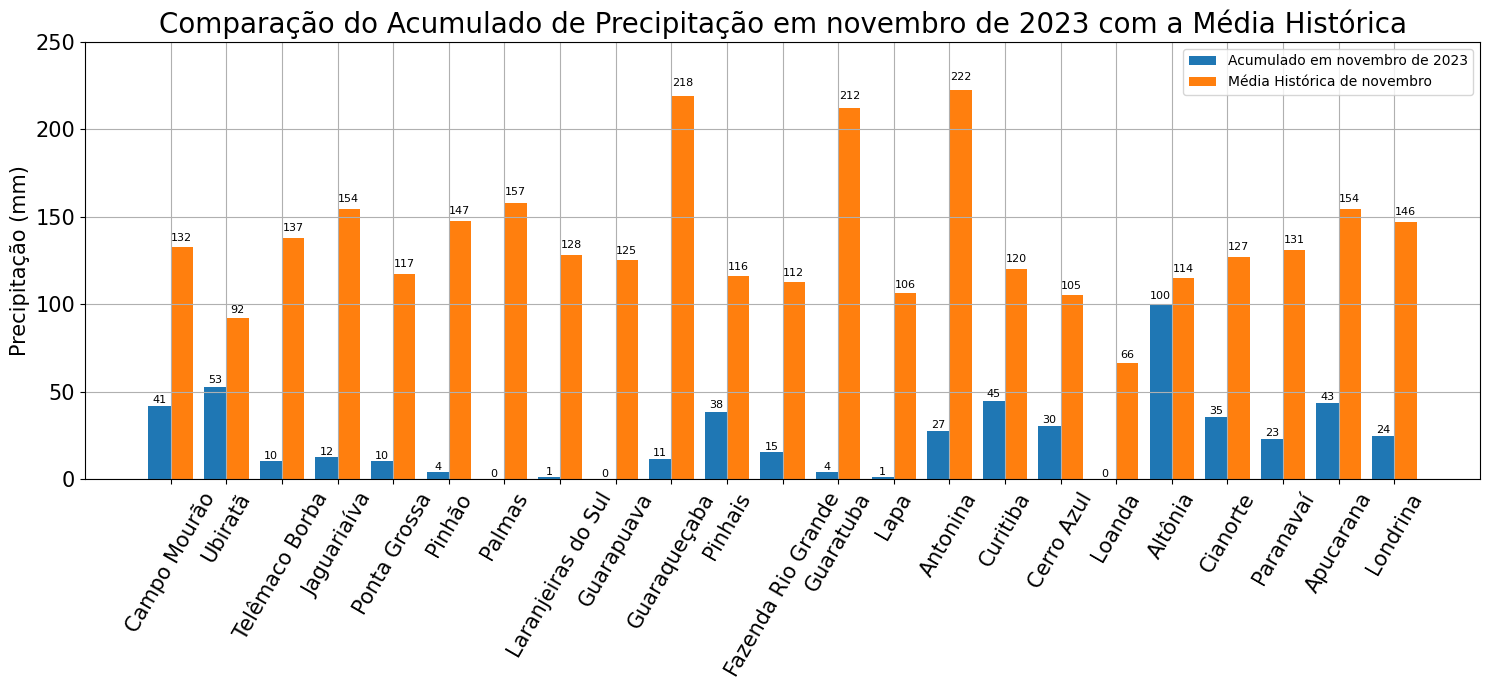

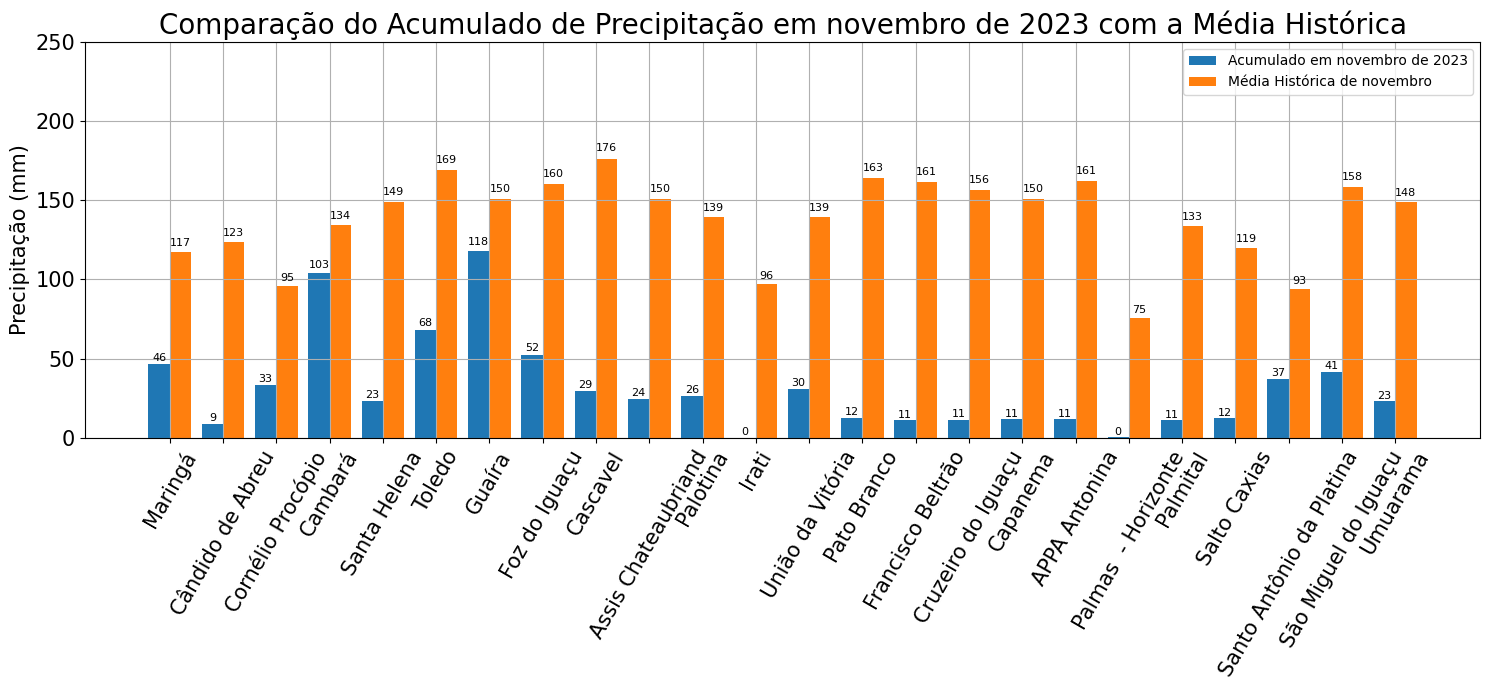

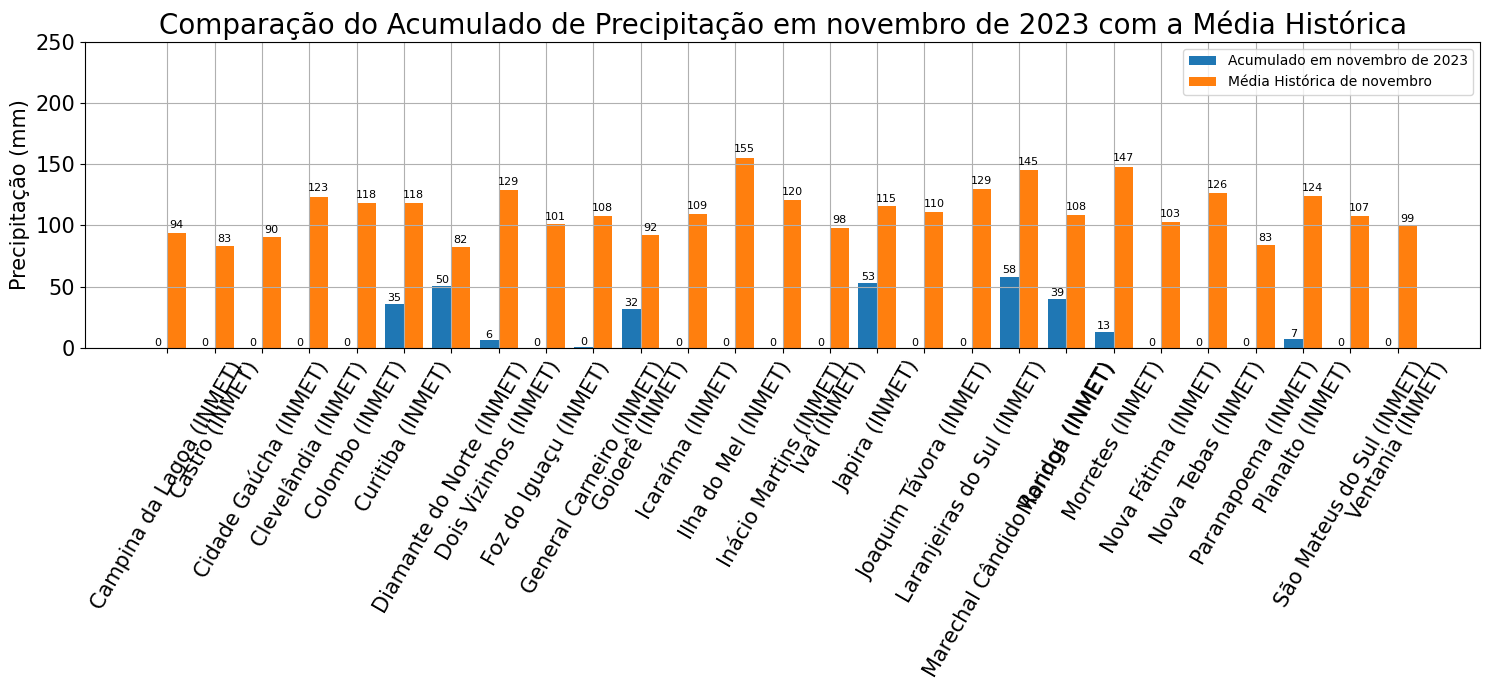

In [47]:
import matplotlib.pyplot as plt
import numpy as np

'''
# Lista com as cidades de interesse
cidades_de_interesse = [
    'Maringá', 'Paranavaí', 'Londrina', 'Apucarana', 'Campo Mourão', 'Ubiratã', 
    'Ponta Grossa', 'Telêmaco Borba', 'Cascavel', 'Foz do Iguaçu', 
    'Pato Branco', 'Francisco Beltrão', 'Guarapuava', 'União da Vitória', 
    'Curitiba', 'Pinhais', 'S. Antônio da Platina', 'Cornélio Procópio'
]

'''
# Seleciona apenas as colunas de interesse
resultado_sliced = resultado.set_index('Estação').T

regiao_dic = {
    'Altônia': 'Noroeste Paranaense',
    'Antonina': 'Metropolitana de Curitiba',
    'Apucarana': 'Norte Central Paranaense',
    'Assis Chateaubriand': 'Oeste Paranaense',
    'Capanema': 'Sudoeste Paranaense',
    'Cambará': 'Norte Pioneiro Paranaense',
    'Campo Mourão': 'Centro Ocidental Paranaense',
    'Cascavel': 'Oeste Paranaense',
    'Cerro Azul': 'Metropolitana de Curitiba',
    'Cianorte': 'Noroeste Paranaense',
    'Cornélio Procópio': 'Norte Pioneiro Paranaense',
    'Curitiba': 'Metropolitana de Curitiba',
    'Cândido de Abreu': 'Norte Central Paranaense',
    'Guarapuava': 'Centro-Sul Paranaense',
    'Fazenda Rio Grande': 'Metropolitana de Curitiba',
    'Irati': 'Sudeste Paranaense',
    'Cruzeiro do Iguaçu': 'Sudoeste Paranaense',
    'Foz do Iguaçu': 'Oeste Paranaense',
    'Francisco Beltrão': 'Sudoeste Paranaense',
    'Guaíra': 'Oeste Paranaense',
    'Guaratuba': 'Metropolitana de Curitiba',
    'Jaguariaíva': 'Centro Oriental Paranaense',
    'Lapa': 'Metropolitana de Curitiba',
    'Laranjeiras do Sul': 'Centro-Sul Paranaense',
    'Loanda': 'Noroeste Paranaense',
    'Londrina': 'Norte Central Paranaense',
    'Maringá': 'Norte Central Paranaense',
    'Palmas': 'Centro-Sul Paranaense',
    'S. Maria do Oeste': 'Centro-Sul Paranaense',
    'Palotina': 'Oeste Paranaense',
    'Paranaguá': 'Metropolitana de Curitiba',
    'Paranavaí': 'Noroeste Paranaense',
    'Pato Branco': 'Sudoeste Paranaense',
    'Pinhais': 'Metropolitana de Curitiba',
    'Pinhão': 'Centro-Sul Paranaense',
    'Ponta Grossa': 'Centro Oriental Paranaense',
    'Guaraqueçaba': 'Metropolitana de Curitiba',
    'Candói': 'Centro-Sul Paranaense',
    'Santa Helena': 'Oeste Paranaense',
    'S. Antônio da Platina': 'Norte Pioneiro Paranaense',
    'S. Miguel do Iguaçu': 'Oeste Paranaense',
    'Telêmaco Borba': 'Centro Oriental Paranaense',
    'Toledo': 'Oeste Paranaense',
    'Ubiratã': 'Centro Ocidental Paranaense',
    'União da Vitória': 'Sudeste Paranaense'
}

resultado_filtrado = resultado_sliced

# Transpondo o dataframe para tornar a cidade uma coluna
resultado_filtrado = resultado_filtrado.T

# Adicionando a coluna de região
resultado_filtrado['Região'] = resultado_filtrado.index.map(regiao_dic)

# Ordenando por região
resultado_filtrado = resultado_filtrado.sort_values(by='Região')

resultado.T_by_region = resultado_filtrado

# Removendo a coluna de região após a ordenação
resultado_filtrado = resultado_filtrado.drop(columns=['Região'])

resultado_filtrado.T.rename(columns = {'Santo Antônio da Platina': 'S. Antônio da Platina',
                             'São Miguel do Iguaçu':'S. Miguel do Iguaçu'}, inplace=True)

resultado_filtrado.T.drop(columns = ['Palmas  - Horizonte'])

resultado_filtrado1 = resultado_filtrado.iloc[:23]
resultado_filtrado2 = resultado_filtrado.iloc[23:47]
resultado_filtrado3 = resultado_filtrado.iloc[47:]

resultado_filtrado1.reset_index(inplace=True)
resultado_filtrado2.reset_index(inplace=True)
resultado_filtrado3.reset_index(inplace=True)

data_especifica = '2023-11-23'

def plot_segmento(df_segmento):
    # Configurar o tamanho do gráfico
    plt.figure(figsize=(15, 7))

    # Posições das barras no eixo x
    posicoes = np.arange(len(df_segmento['Estação']))

    # Criar barras para o acumulado e a média histórica
    fig1 = plt.bar(posicoes - 0.2, df_segmento[f'Acumulado em {data_especifica}'], width=0.4, label='Acumulado em novembro de 2023')
    fig2 = plt.bar(posicoes + 0.2, df_segmento['Média histórica de novembro'], width=0.4, label='Média Histórica de novembro')

    # Adiciona o valor dos dados sobre as barras
    for fig in [fig1, fig2]:
        for bar in fig:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., 1.02*height, '%d' % int(height), ha='center', va='bottom', fontsize=8)

    # Adicionar rótulos e título
    plt.ylabel('Precipitação (mm)', fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(0, 250)
    plt.title('Comparação do Acumulado de Precipitação em novembro de 2023 com a Média Histórica', fontsize=20)
    plt.xticks(posicoes, df_segmento['Estação'], rotation=60)
    plt.xticks(fontsize=15)
    plt.legend()

    # Ajustar layout e mostrar o gráfico
    plt.tight_layout()
    plt.grid()
    plt.show()

# Segmentar o dataframe
resultado_filtrado1 = resultado_filtrado.iloc[:23]
resultado_filtrado2 = resultado_filtrado.iloc[23:47]
resultado_filtrado3 = resultado_filtrado.iloc[47:]

# Resetar os índices
resultado_filtrado1.reset_index(inplace=True)
resultado_filtrado2.reset_index(inplace=True)
resultado_filtrado3.reset_index(inplace=True)

# Plotar gráficos para cada segmento
plot_segmento(resultado_filtrado1)
plot_segmento(resultado_filtrado2)
plot_segmento(resultado_filtrado3)

In [42]:
resultado_sliced

Estação,Altônia,Antonina,APPA Antonina,Apucarana,Assis Chateaubriand,Cambará,Campo Mourão,Capanema,Cascavel,Cerro Azul,Cianorte,Cornélio Procópio,Curitiba,Cândido de Abreu,Guarapuava,Fazenda Rio Grande,Irati,Cruzeiro do Iguaçu,Foz do Iguaçu,Francisco Beltrão,Guaíra,Guaratuba,Jaguariaíva,Lapa,Laranjeiras do Sul,Loanda,Londrina,Maringá,Palmas,Palmas - Horizonte,Palmital,Palotina,Paranavaí,Pato Branco,Pinhais,Pinhão,Ponta Grossa,Guaraqueçaba,Salto Caxias,Santa Helena,Santo Antônio da Platina,São Miguel do Iguaçu,Telêmaco Borba,Toledo,Ubiratã,Umuarama,União da Vitória,Campina da Lagoa (INMET),Castro (INMET),Cidade Gaúcha (INMET),Clevelândia (INMET),Colombo (INMET),Curitiba (INMET),Diamante do Norte (INMET),Dois Vizinhos (INMET),Foz do Iguaçu (INMET),General Carneiro (INMET),Goioerê (INMET),Icaraíma (INMET),Ilha do Mel (INMET),Inácio Martins (INMET),Ivaí (INMET),Japira (INMET),Joaquim Távora (INMET),Laranjeiras do Sul (INMET),Marechal Cândido Rondon (INMET),Maringá (INMET),Morretes (INMET),Nova Fátima (INMET),Nova Tebas (INMET),Paranapoema (INMET),Planalto (INMET),São Mateus do Sul (INMET),Ventania (INMET)
Acumulado em 2023-11-23,100.00,27.80,11.60,43.6,24.80,103.80,41.80,11.60,29.4,30.60,35.80,33.60,45.00,9.00,0.2,15.60,0.2,11.4,52.20,11.20,118.00,4.20,12.80,1.20,1.20,0.20,24.8,46.40,0.20,0.4,11.00,26.60,23.00,12.80,38.80,4.40,10.40,11.80,12.20,23.40,37.20,41.40,10.40,68.20,53.00,23.00,30.60,0.00,0.00,0.00,0.00,0.00,35.80,50.40,6.40,0.00,0.40,32.20,0.00,0.00,0.00,0.00,53.00,0.00,0.00,58.00,39.80,13.20,0.0,0.00,0.20,7.00,0.00,0.00
Acumulado entre 2023-11-01 e 2023-11-23,148.60,178.80,128.20,159.2,107.00,167.00,92.20,280.60,165.8,78.60,95.60,95.40,242.40,163.40,170.2,125.00,120.2,308.8,308.40,333.40,175.60,105.60,36.60,100.20,183.40,8.80,86.4,144.80,371.60,42.4,155.20,132.80,51.80,356.20,187.80,151.40,71.80,206.20,329.40,186.00,94.60,339.60,79.20,238.80,183.00,29.20,252.20,118.20,44.60,37.20,201.00,113.60,194.20,84.60,247.20,194.20,48.00,92.80,0.00,0.00,140.80,0.00,133.40,1.40,221.20,174.40,160.80,169.80,0.0,0.00,72.00,157.40,104.60,61.20
Acumulado de novembro,148.60,178.80,128.20,159.2,107.00,167.00,92.20,280.60,165.8,78.60,95.60,95.40,242.40,163.40,170.2,125.00,120.2,308.8,308.40,333.40,175.60,105.60,36.60,100.20,183.40,8.80,86.4,144.80,371.60,42.4,155.20,132.80,51.80,356.20,187.80,151.40,71.80,206.20,329.40,186.00,94.60,339.60,79.20,238.80,183.00,29.20,252.20,118.20,44.60,37.20,201.00,113.60,194.20,84.60,247.20,194.20,48.00,92.80,0.00,0.00,140.80,0.00,133.40,1.40,221.20,174.40,160.80,169.80,0.0,0.00,72.00,157.40,104.60,61.20
Acumulado em 2023,1183.00,2589.60,1351.00,1458.6,1594.00,1351.80,1714.60,1908.20,1787.2,1416.60,1221.40,1192.00,1625.20,1700.20,2017.2,1633.40,1765.6,2293.0,1989.20,2356.60,1605.80,2908.60,1476.00,1305.80,2042.60,1177.00,1236.6,1202.40,2297.40,1646.0,1836.40,1512.60,1529.20,2177.40,1622.40,1989.80,1288.40,2923.00,2245.00,1624.60,1357.60,1979.20,1706.60,1668.40,1714.60,1276.60,1996.20,940.00,621.40,1202.60,417.40,1719.40,1428.80,1239.80,2246.00,2072.00,1461.20,1610.60,457.20,0.00,1944.40,575.80,1497.40,393.40,1997.00,1133.00,1479.80,2378.80,108.0,132.80,1026.60,1114.20,1025.00,1546.40
Média histórica de novembro,114.83,222.65,161.86,154.3,150.84,134.06,132.55,150.71,176.0,105.29,127.18,95.57,120.41,123.61,125.1,112.57,96.8,156.2,160.06,161.41,150.71,212.23,154.29,106.39,128.29,66.66,146.9,117.26,157.97,75.8,133.61,139.46,131.22,163.97,116.15,147.39,117.66,218.98,119.96,149.17,93.96,158.18,137.91,169.06,92.37,148.64,139.15,94.08,83.11,90.52,123.66,118.65,118.52,82.75,129.08,101.14,108.04,92.13,109.46,155.24,120.86,98.12,115.59,110.95,129.48,145.07,108.67,147.83,103.2,126.83,83.92,124.24,107.98,99.46
Anomalia de novembro em relação à média histórica para o mês,33.77,-43.85,-33.66,4.9,-43.84,32.94,-40.35,129.89,-10.2,-26.69,-31.58,-0.17,121.99,39.79,45.1,12.43,23.4,152.6,148.34,171.99,24.89,-106.63,-117.69,-6.19,55.11,-57.86,-60.5,27.54,213.63,-33.4,21.59,-6.66,-79.42,192.23,71.65,4.01,-45.86,-12.78,209.44,36.83,

# Tabela ISE

In [37]:
regiao_dic = {
    'Altônia': 'Noroeste',
    'Antonina': 'Leste',
    'Apucarana': 'Norte',
    'Assis Chateaubriand': 'Oeste',
    'Capanema': 'Oeste',
    'Cambará': 'Norte',
    'Campo Mourão': 'Noroeste',
    'Capitão Leônidas Marques': 'Oeste',
    'Cascavel': 'Oeste',
    'Cerro Azul': 'Leste',
    'Cianorte': 'Noroeste',
    'Cornélio Procópio': 'Norte',
    'Curitiba': 'Leste',
    'Cândido de Abreu': 'Norte',
    'Guarapuava': 'Centro-Sul',
    'Guaraqueçaba': 'Leste',
    'Fazenda Rio Grande': 'Leste',
    'Irati': 'Centro-Sul',
    'Cruzeiro do Iguaçu': 'Oeste',
    'Foz do Iguaçu': 'Oeste',
    'Francisco Beltrão': 'Oeste',
    'Guaíra': 'Oeste Paranaense',
    'Guaratuba': 'Leste',
    'Jaguariaíva': 'Centro-Sul',
    'Lapa': 'Leste',
    'Laranjeiras do Sul': 'Oeste',
    'Loanda': 'Noroeste',
    'Londrina': 'Norte',
    'Maringá': 'Norte',
    'Palmas': 'Oeste',
    'S. Maria do Oeste': 'Centro-Sul',
    'Palotina': 'Oeste',
    'Paranaguá': 'Leste',
    'Paranavaí': 'Noroeste',
    'Pato Branco': 'Oeste',
    'Pinhais': 'Leste',
    'Pinhão': 'Centro-Sul',
    'Ponta Grossa': 'Centro-Sul',     
    'Santa Helena': 'Oeste',
    'S. Antônio da Platina': 'Norte',
    'S. Miguel do Iguaçu': 'Oeste',
    'Telêmaco Borba': 'Centro-Sul',
    'Toledo': 'Oeste',
    'Ubiratã': 'Noroeste',
    'União da Vitória': 'Centro-Sul',
    'Campina da Lagoa (INMET)': 'Oeste',
    'Campo Mourão  (INMET)': 'Norte',
    'Castro (INMET)': 'Centro-Sul',
    'Cidade Gaúcha (INMET)': 'Noroeste',
    'Clevelândia (INMET)': 'Oeste',
    'Colombo (INMET)': 'Leste',
    'Cornélio Procópio (INMET)': 'Norte',
    'Curitiba (INMET)': 'Leste',
    'Diamante do Norte (INMET)': 'Noroeste',
    'Dois Vizinhos (INMET)': 'Oeste',
    'Foz do Iguaçu (INMET)': 'Oeste',
    'General Carneiro (INMET)': 'Centro-Sul',
    'Goioerê (INMET)': 'Noroeste',
    'Icaraíma (INMET)': 'Noroeste',
    'Paranaguá (INMET)': 'Leste',
    'Inácio Martins (INMET)': 'Centro-Sul',
    'Irati (INMET)': 'Centro-Sul',
    'Ivaí (INMET)': 'Centro-Sul',
    'Japira (INMET)': 'Norte',
    'Joaquim Távora (INMET)': 'Norte',
    'Laranjeiras do Sul (INMET)': 'Oeste',
    'Londrina (INMET)': 'Noroeste',
    'Marechal Cândido Rondon (INMET)': 'Oeste',
    'Maringá (INMET)': 'Noroeste',
    'Morretes (INMET)': 'Leste',
    'Nova Fátima (INMET)': 'Norte',
    'Nova Tebas (INMET)': 'Noroeste',
    'Paranaguá (INMET)': 'Leste',
    'Paranapoema (INMET)': 'Noroeste',
    'Planalto (INMET)': 'Oeste',
    'São Mateus do Sul (INMET)': 'Centro-Sul',
    'Ventania (INMET)': 'Centro-Sul'
}

resultado_filtrado = merged_df['2023-11-23':'2023-11-23']

# Transpondo o dataframe para tornar a cidade uma coluna
resultado_filtrado = resultado_filtrado.T

# Adicionando a coluna de região
resultado_filtrado['Região'] = resultado_filtrado.index.map(regiao_dic)

# Ordenando por região
resultado_filtrado = resultado_filtrado.sort_values(by='Região')

resultado.T_by_region = resultado_filtrado

# Removendo a coluna de região após a ordenação
#resultado_filtrado = resultado_filtrado.drop(columns=['Região'])

resultado_filtrado.T.rename(columns = {'Santo Antônio da Platina': 'S. Antônio da Platina',
                             'São Miguel do Iguaçu':'S. Miguel do Iguaçu'}, inplace=True)

resultado_filtrado.T.drop(columns = ['Palmas  - Horizonte'])
resultado_filtrado.columns = ['23/11/2023','Região']

# Selecionando apenas as colunas numéricas para aplicar o filtro
colunas_numericas = resultado_filtrado.select_dtypes(include=['float64', 'int64'])

resultado_filtrado = resultado_filtrado[(colunas_numericas > 0).any(axis=1)]
resultado_filtrado.sort_values(by = '23/11/2023', ascending = False)

,23/11/2023,Região
Município,,
Guaíra,118.0,Oeste Paranaense
Cambará,103.8,Norte
Altônia,100.0,Noroeste
Toledo,68.2,Oeste
Marechal Cândido Rondon (INMET),58.0,Oeste
Ubiratã,53.0,Noroeste
Japira (INMET),53.0,Norte
Foz do Iguaçu,52.2,Oeste
Diamante do Norte (INMET),50.4,Noroeste


In [7]:
url = f'https://cluster.simepar.br/rest-telemetric/dailysummary?start_date={data_i}&end_date={data_f}& \
organizations=1&stationtypes=M&stations=25005051&sensors={i_sensors}&operations={i_operations}& \
federativeunits=PR'

response = requests.get(url)

df = pd.DataFrame(response.json())
df['data'] = pd.to_datetime(df['data'])
df.set_index('data', inplace=True)
df

,stationId,sensorId,operationId,value
data,,,,
2023-10-13,25005051,7,4,0.2
2023-10-12,25005051,7,4,0.4
2023-10-11,25005051,7,4,0.0
2023-10-10,25005051,7,4,0.0
2023-10-09,25005051,7,4,0.2
...,...,...,...,...
2006-12-07,25005051,7,4,0.2
2006-12-06,25005051,7,4,14.4
2006-12-05,25005051,7,4,0.0


# Acumulado em um Período e Comparação Histórica

In [8]:
import pandas as pd

def analise_precipitacao_historica(df, inicio_periodo, fim_periodo):
    mes_referencia = pd.to_datetime(inicio_periodo).month
    dia_inicio = pd.to_datetime(inicio_periodo).day
    dia_fim = pd.to_datetime(fim_periodo).day

    records = []

    for municipio in df.columns:
        df_municipio = df[municipio].dropna()
        
        # Filtra os dados para o mês de interesse em todos os anos
        df_municipio_mes = df_municipio[df_municipio.index.month == mes_referencia]
        
        df_municipio_periodo = df_municipio_mes.groupby(df_municipio_mes.index.year).apply(lambda x: x[(x.index.day >= dia_inicio) & (x.index.day <= dia_fim)].sum())

        # Valor máximo de acumulado e o ano correspondente
        max_acumulado = df_municipio_periodo.max()
        ano_max_acumulado = df_municipio_periodo.idxmax()

        # Acumulado para o período no ano das variáveis 'inicio_periodo' e 'fim_periodo'
        ano_referencia = pd.to_datetime(inicio_periodo).year
        acumulado_referencia = df_municipio_periodo.get(ano_referencia, 0)

        # Anomalia em percentual
        anomalia = ((max_acumulado - acumulado_referencia) / acumulado_referencia) * 100 if acumulado_referencia != 0 else float('nan')

        records.append({
            'Acumulado Referência': acumulado_referencia,
            'Máximo Acumulado': max_acumulado,
            'Ano do Recorde': ano_max_acumulado,            
            'Anomalia (%)': anomalia
        })

    # Converte os registros em um DataFrame com municípios como índices
    records_df = pd.DataFrame(records, index=df.columns)
    records_df.index.name = 'Município'

    return records_df

records_df = analise_precipitacao_historica(merged_df, '2023-11-01', '2023-11-23')
records_df

,Acumulado Referência,Máximo Acumulado,Ano do Recorde,Anomalia (%)
Município,,,,
Altônia,4.4,4.4,2023,0.000000
Antonina,2.4,84.6,2006,3425.000000
APPA Antonina,6.2,16.2,2016,161.290323
Apucarana,0.0,65.6,2008,NaN
Assis Chateaubriand,0.6,68.2,2008,11266.666667
...,...,...,...,...
Nova Tebas (INMET),0.0,42.6,2007,NaN
Paranapoema (INMET),0.0,31.8,2008,NaN
Planalto (INMET),0.0,33.6,2008,NaN


In [9]:
records_df.to_excel('Chuva_ISE_02112023.xlsx')

In [10]:
merged_df.to_excel('Chuva_historica_SIMEPAR.xlsx')